<a href="https://colab.research.google.com/github/knc6/jarvis-tools-notebooks/blob/master/JARVIS_STM_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jarvis-tools

Obtaining raw io files 145k...
Reference:https://www.nature.com/articles/s41524-020-00440-1
Loading the zipfile...
Loading completed.
min Z and maxZ 0.0010819 0.012591


(-0.5, 1439.5, 868.5, -0.5)

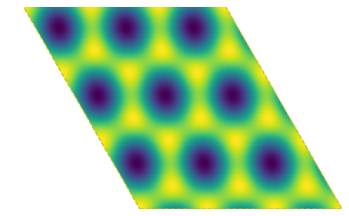

In [3]:
from jarvis.db.figshare import data
import os, requests, io, tempfile, zipfile
from jarvis.analysis.stm.tersoff_hamann import TersoffHamannSTM
import matplotlib.pyplot as plt
%matplotlib inline

fls = data("raw_files")


def make_stm_from_pchg(
    jid="JVASP-667", bias="Negative", filename="stm_image.png",min_size=5
):
    for i in fls["STM"]:
        zip_name = jid + "_" + bias + ".zip"
        if i["name"] == zip_name:
            zip_file_url = i["download_url"]
            r = requests.get(zip_file_url)
            z = zipfile.ZipFile(io.BytesIO(r.content))
            pchg = z.read("PARCHG").decode("utf-8")
            fd, path = tempfile.mkstemp()
            with os.fdopen(fd, "w") as tmp:
                tmp.write(pchg)
            TH_STM = TersoffHamannSTM(
                chg_name=path, min_size=min_size, zcut=None
            )
            t_height = TH_STM.constant_height(filename=filename)


make_stm_from_pchg()
plt.imshow(plt.imread("stm_image.png"))
plt.axis('off')